<a href="https://colab.research.google.com/github/choius0528/Machine-Learning_Study/blob/main/5%EC%A3%BC%EC%B0%A8/DL_w5_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#필기체 소스를 활용한 딥러닝 실습

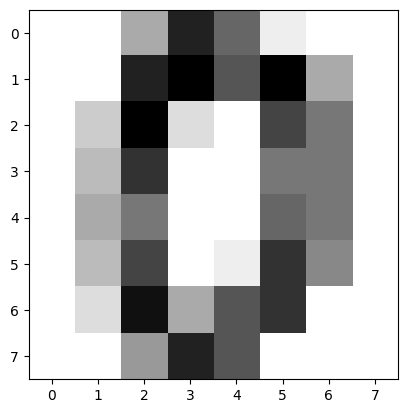

In [48]:
#데이터 불러오기
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [51]:
#데이터 전처리
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [52]:
#모델 구현
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
#분류 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
#모델을 이용한 학습
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3937 - loss: 2.4311 - val_accuracy: 0.9083 - val_loss: 0.3348
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9161 - loss: 0.2753 - val_accuracy: 0.9389 - val_loss: 0.1857
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9706 - loss: 0.1261 - val_accuracy: 0.9639 - val_loss: 0.1448
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9818 - loss: 0.0972 - val_accuracy: 0.9611 - val_loss: 0.1453
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9889 - loss: 0.0552 - val_accuracy: 0.9778 - val_loss: 0.1163
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9848 - loss: 0.0505 - val_accuracy: 0.9694 - val_loss: 0.1091
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9944 - loss: 0.0320 - val_accuracy: 0.9694 - val_loss: 0.1010
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9967 - loss: 0.0237 - val_accuracy: 0.9778 - val_loss

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


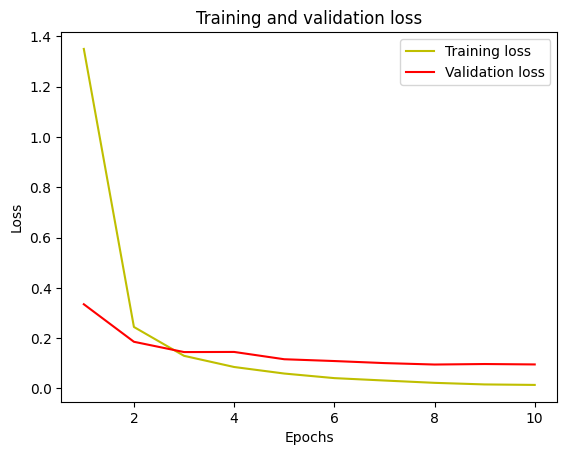

In [57]:
#시각화
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


y_pred = model.predict(X_test)

y_pred_class = np.argmax(y_pred,axis=1)


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

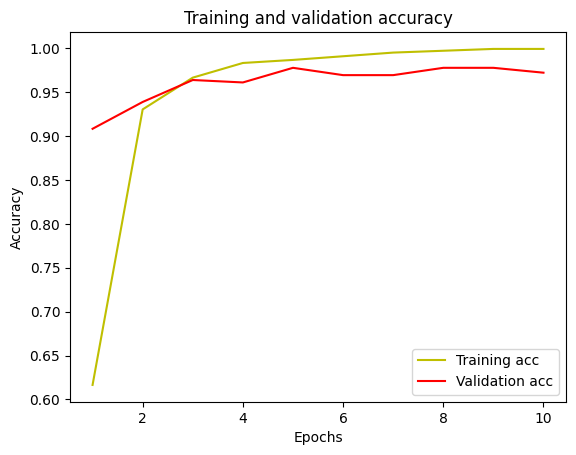

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()